In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 5,5
rcParams['figure.dpi'] = 200
rcParams.update({'font.size': 10})

In [2]:
def Gaussian2D(z, mu=(0,0)):
    return np.exp(-0.5*((z - mu)**2).sum(2))

def plot_org_space(u, empty_sqaure=9):
    for i, img in enumerate(org_space[u]):
        plt.gca().invert_yaxis()
        off = 1 if i < empty_sqaure else 2
        plt.subplot(33*10+i+off)
        plt.axis('off')
        plt.axvline(x=25,color='red',alpha=0.4)
        plt.axhline(y=25,color='red',alpha=0.4)
        plt.imshow(img, cmap='gray')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [3]:
U = [(-1,-1),
     (-1, 1),
     ( 1,-1),
     ( 1, 1)]

a = 5
b = 5
n = 8
x, y = np.meshgrid(np.linspace(-a,a,50), np.linspace(-b,b,50))
z = np.stack((x,y),2)
latent_space = {}
org_space = {}
for u in U:
    tmp = []
    for _ in range(n):
        tmp.append([np.random.uniform(a*u[0], 0),np.random.uniform(b*u[1], 0)])
    latent_space[u] = np.array(tmp)
    org_space[u] = [Gaussian2D(z, mu) for mu in tmp]

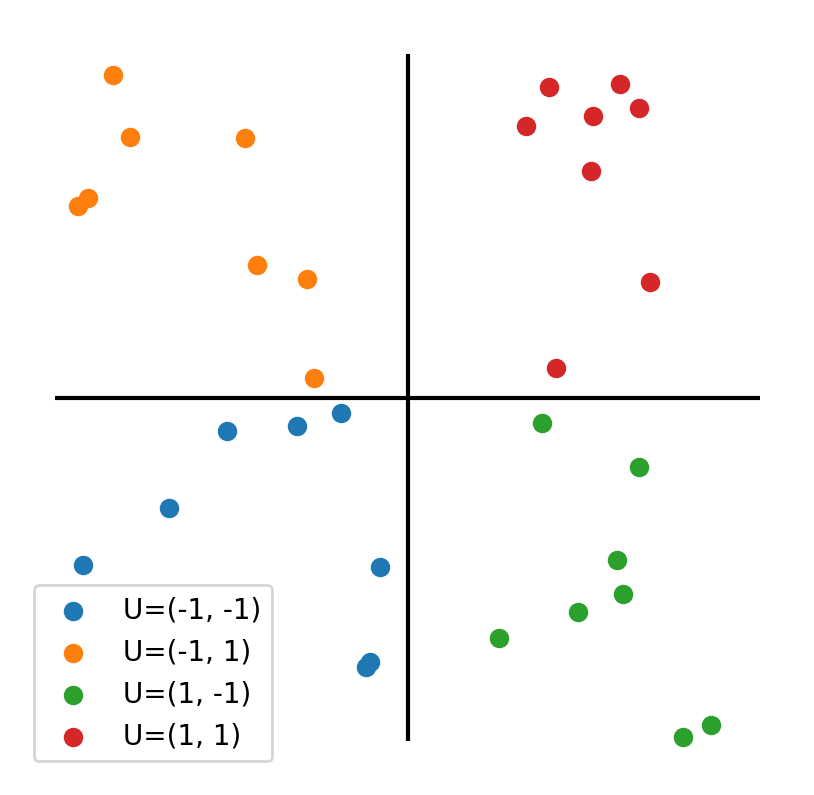

In [9]:
for u,z in latent_space.items():
    plt.scatter(z[:,0], z[:,1], label=f'U={u}')
    
plt.axis('off')
plt.hlines(0,-a,a)
plt.vlines(0,-b,b)
plt.legend()
plt.show()

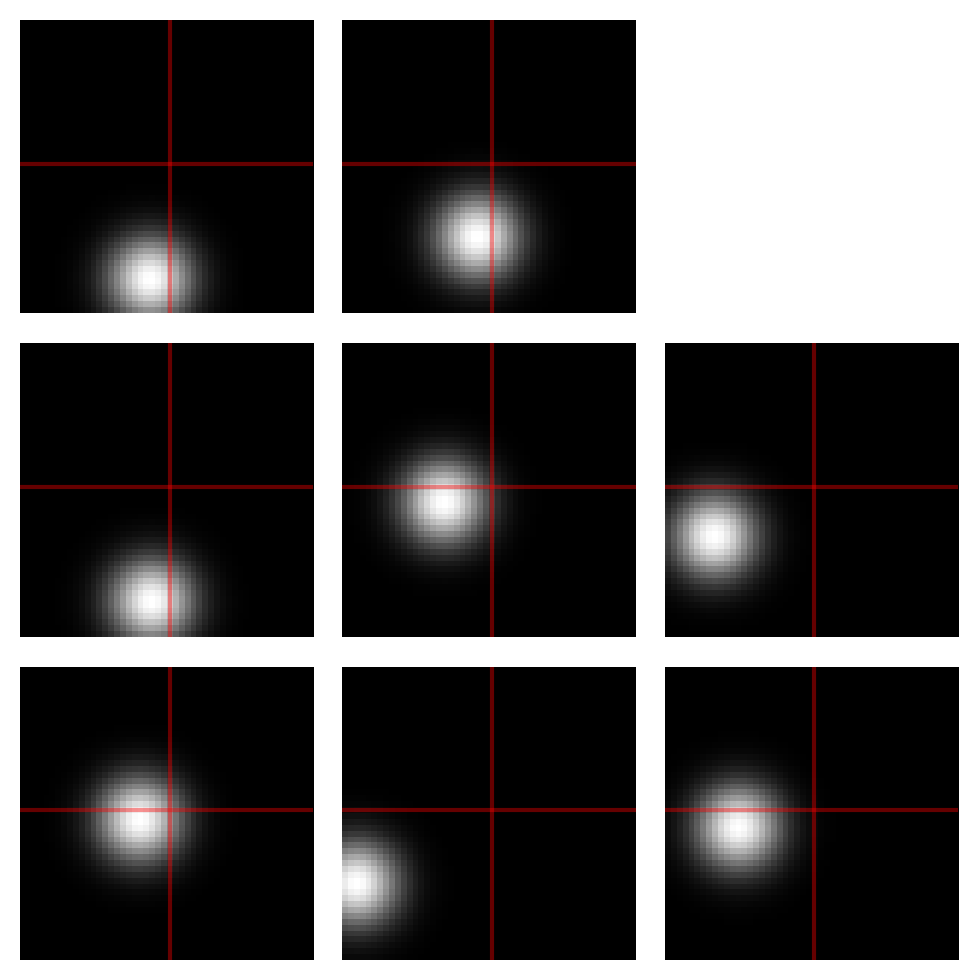

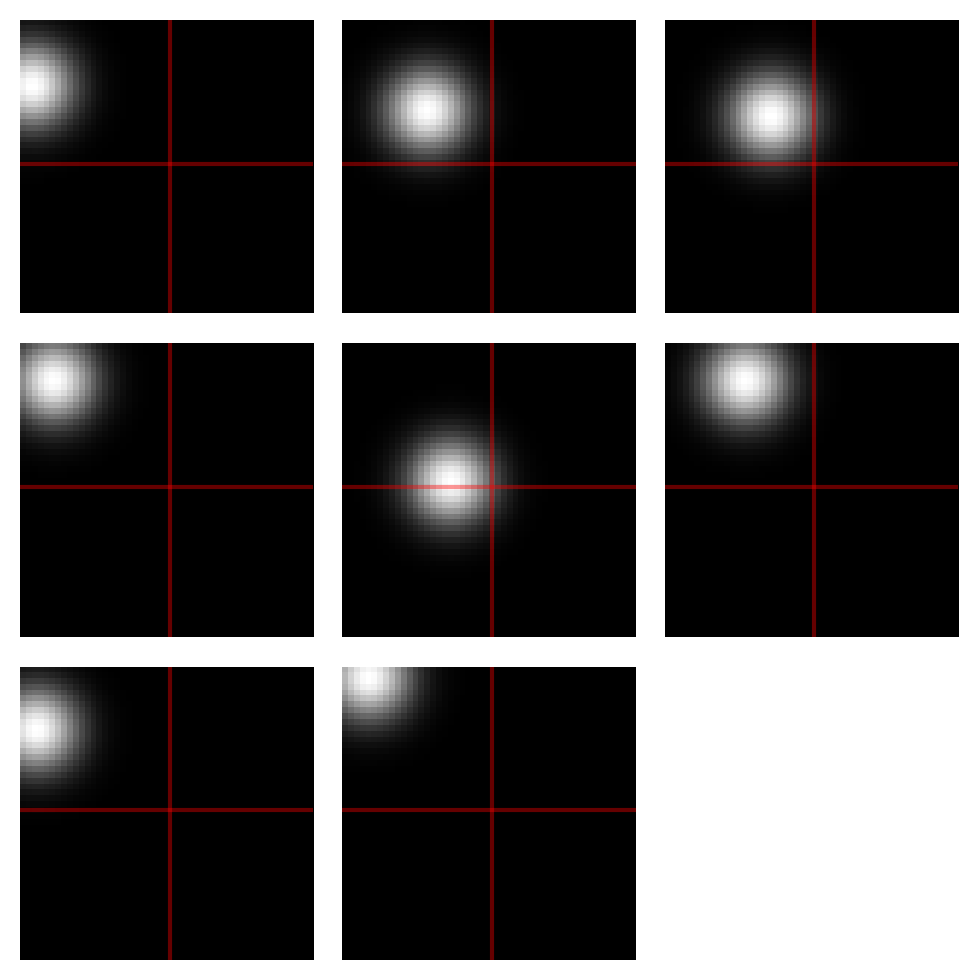

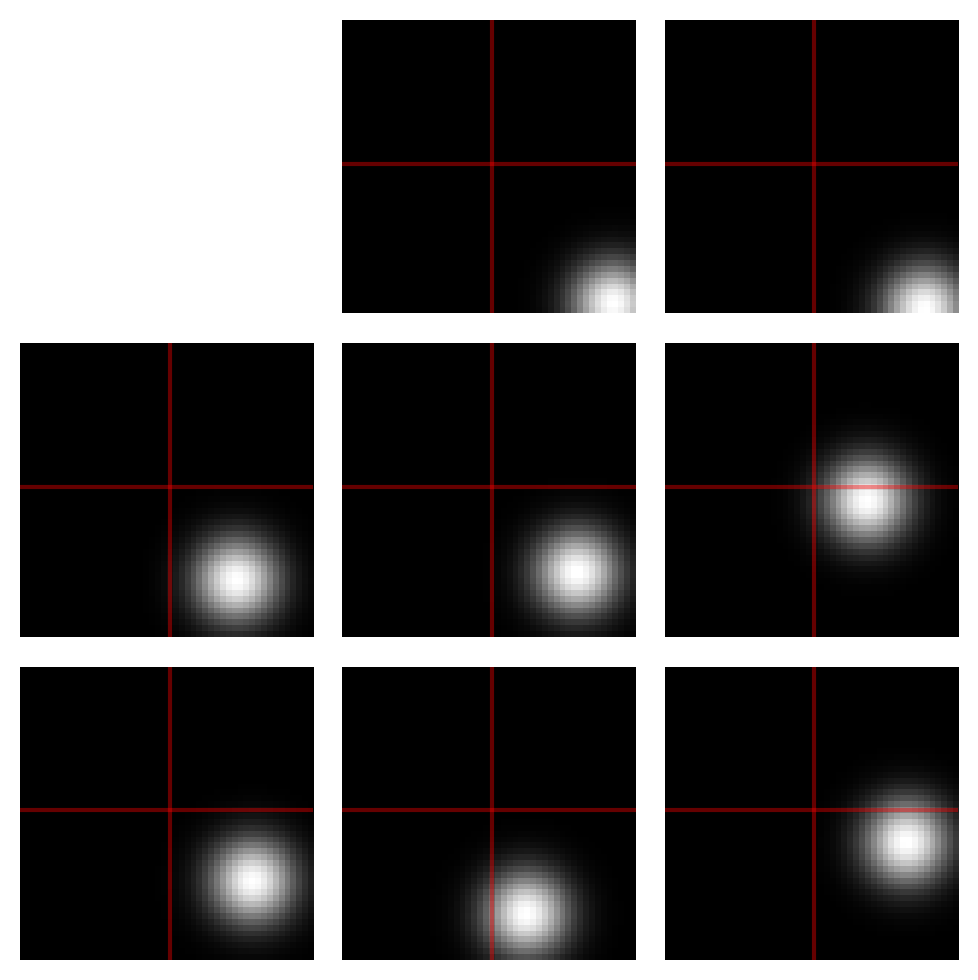

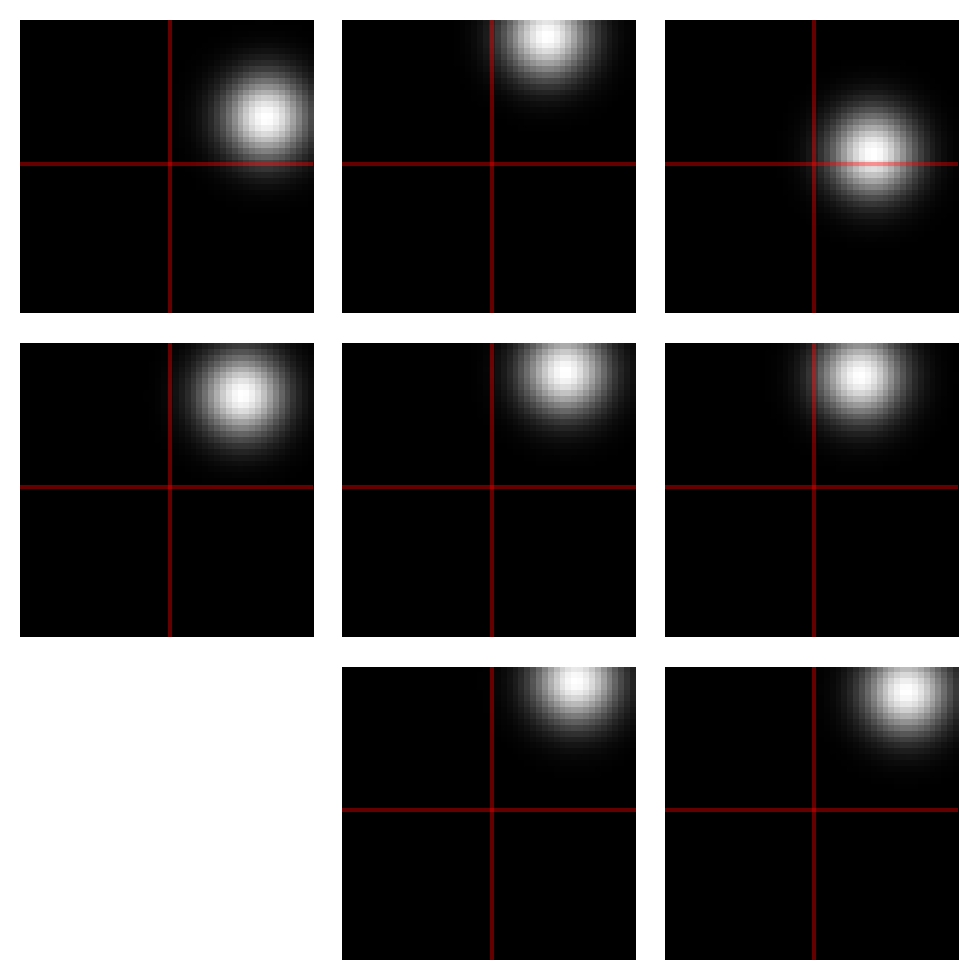

In [10]:
empty_square_lst = [2, 8, 0, 6]
for u, empty_square in zip(U, empty_square_lst):
    plot_org_space(u, empty_square)